# Task 1. Exploratory Data Analysis (EDA)

## Background Information

This task is based on a synthesised transaction dataset containing 3 months’ worth of transactions for 100 hypothetical customers. It contains purchases, recurring transactions, and salary transactions.

The dataset is designed to simulate realistic transaction behaviours that are observed in ANZ’s real transaction data, so many of the insights you can gather from the tasks below will be genuine.

The relevant dataset is linked below for you. 

## Tasks

1. Load the transaction dataset below into an analysis tool of your choice (Excel, R, SAS, Tableau, or similar)


2. Start by doing some basic checks – are there any data issues? Does the data need to be cleaned?


3. Gather some interesting overall insights about the data. For example -- what is the average transaction amount? How many transactions do customers make each month, on average?


4. Segment the dataset by transaction date and time. Visualise transaction volume and spending over the course of an average day or week. Consider the effect of any outliers that may distort your analysis.


5. For a challenge – what insights can you draw from the location information provided in the dataset?


6. Put together 2-3 slides summarising your most interesting findings to ANZ management.

In [1]:
import os
from datetime import *

import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# import matplotlib.gridspec as gridspec # Alignments

print(f"Matplotlib Version : {mpl.__version__}")
print(f"Seaborn Version : {sns.__version__}")

Matplotlib Version : 3.3.2
Seaborn Version : 0.11.0


In [2]:
%ls

 Volume in drive D is New Volume
 Volume Serial Number is AA35-4C60

 Directory of D:\1. Data365\1. Data Analyst Portfolio\4. DataANZ

01/10/2021  11:06 PM    <DIR>          .
01/10/2021  11:06 PM    <DIR>          ..
01/10/2021  02:32 PM    <DIR>          .ipynb_checkpoints
01/10/2021  11:06 PM           141,088 1_DataANZ_Virtual_Internship_Program.ipynb
01/10/2021  02:25 PM         1,782,724 ANZ synthesised transaction dataset.xlsx
01/10/2021  08:46 PM            17,348 DataANZ.docx
               3 File(s)      1,941,160 bytes
               3 Dir(s)  125,663,588,352 bytes free


In [3]:
pd.options.display.max_columns = 40
pd.options.display.max_rows = 1000
# pd.set_option('display.max.rows', 100)

In [4]:
print(pd.get_option('display.max.columns'))
print(pd.get_option('display.max.rows'))

40
1000


## 1. Load the dataset

In [5]:
df = pd.read_excel('ANZ synthesised transaction dataset.xlsx')
print(df.shape) # 12,043 rows and 23 columns
df.head()

(12043, 23)


,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


## 2. Basic checks

There is first_name, but not last_name...

In [6]:
# Display existing columns
df.columns

Index(['status', 'card_present_flag', 'bpay_biller_code', 'account',
       'currency', 'long_lat', 'txn_description', 'merchant_id',
       'merchant_code', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'country', 'customer_id', 'merchant_long_lat',
       'movement'],
      dtype='object')

In [7]:
# Check types of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   bpay_biller_code   885 non-null    object        
 3   account            12043 non-null  object        
 4   currency           12043 non-null  object        
 5   long_lat           12043 non-null  object        
 6   txn_description    12043 non-null  object        
 7   merchant_id        7717 non-null   object        
 8   merchant_code      883 non-null    float64       
 9   first_name         12043 non-null  object        
 10  balance            12043 non-null  float64       
 11  date               12043 non-null  datetime64[ns]
 12  gender             12043 non-null  object        
 13  age                12043 non-null  int64         
 14  mercha

Many missing values in *bpay_biller_code* and *merchant_code*, and I might simply be able to drop the columns.

The following features have the same amount of missing data:
* card_present_flag
* merchant_id
* merchant_suburb
* merchant_state
* merchant_long_lat

It might be reasonable to think that if a row doesn't have a value in any of those columns, the row is unlikely to have values in the other columns as well.

In [8]:
# Check missing values
print(df.isnull().sum())
print('')

mis_val_cols = []

for col in df.columns:
    if df[col].isnull().sum() >= 1:
        mis_val_cols.append(col)
        print('{} : {}%' .format(col, round(np.mean(df[col].isnull()), 4)))

status                   0
card_present_flag     4326
bpay_biller_code     11158
account                  0
currency                 0
long_lat                 0
txn_description          0
merchant_id           4326
merchant_code        11160
first_name               0
balance                  0
date                     0
gender                   0
age                      0
merchant_suburb       4326
merchant_state        4326
extraction               0
amount                   0
transaction_id           0
country                  0
customer_id              0
merchant_long_lat     4326
movement                 0
dtype: int64

card_present_flag : 0.3592%
bpay_biller_code : 0.9265%
merchant_id : 0.3592%
merchant_code : 0.9267%
merchant_suburb : 0.3592%
merchant_state : 0.3592%
merchant_long_lat : 0.3592%


My inference seems right. The below code shows the rows that have missing values more than 3, and there are 4326 rows.

In [9]:
df.iloc[df[(df.isnull().sum(axis=1) >= 3)].index] # 4326 rows

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
5,posted,NaN,NaN,ACC-1608363396,AUD,151.22 -33.87,PAYMENT,NaN,NaN,Robert,1705.43,2018-08-01,M,20,NaN,NaN,2018-08-01T02:00:00.000+0000,163.0,1005b48a6eda4ffd85e9b649dc9467d3,Australia,CUS-2688605418,NaN,debit
9,posted,NaN,NaN,ACC-602667573,AUD,151.23 -33.96,INTER BANK,NaN,NaN,Michael,466.58,2018-08-01,M,40,NaN,NaN,2018-08-01T06:00:00.000+0000,21.0,798a77869014441b840a7a8a23408332,Australia,CUS-2031327464,NaN,debit
10,posted,NaN,NaN,ACC-2171593283,AUD,146.94 -36.04,PAYMENT,NaN,NaN,Fernando,4348.50,2018-08-01,M,19,NaN,NaN,2018-08-01T06:00:00.000+0000,27.0,baff17b27b2643c48c84fca7129e9611,Australia,CUS-2317998716,NaN,debit
11,posted,NaN,NaN,ACC-2776252858,AUD,144.95 -37.76,PAYMENT,NaN,NaN,Kristin,1203.75,2018-08-01,F,43,NaN,NaN,2018-08-01T06:00:00.000+0000,29.0,78a1b6c3a5534d48828d8ed266ba9c2e,Australia,CUS-4123612273,NaN,debit
13,posted,NaN,NaN,ACC-588564840,AUD,151.27 -33.76,INTER BANK,NaN,NaN,Isaiah,4438.16,2018-08-01,M,23,NaN,NaN,2018-08-01T07:00:00.000+0000,25.0,eaafa602902b4f4194efb96a105dd7ab,Australia,CUS-1462656821,NaN,debit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12027,posted,NaN,NaN,ACC-2173390920,AUD,144.71 -37.58,PHONE BANK,NaN,NaN,Luis,13537.75,2018-10-31,M,27,NaN,NaN,2018-10-31T21:00:00.000+0000,67.0,b2c42c27bb24464cb5e3e0ffbf9b1977,Australia,CUS-3180318393,NaN,debit
12032,posted,NaN,NaN,ACC-1710017148,AUD,150.82 -34.01,PAYMENT,NaN,NaN,Michelle,20699.90,2018-10-31,F,19,NaN,NaN,2018-10-31T22:00:00.000+0000,33.0,96fe9c5dcda24b599e81b6f6d5bdcb66,Australia,CUS-883482547,NaN,debit
12035,posted,NaN,NaN,ACC-1973887809,AUD,115.78 -31.90,PAYMENT,NaN,NaN,Antonio,9349.51,2018-10-31,M,26,NaN,NaN,2018-10-31T23:00:00.000+0000,29.0,dda53e538c5b4d5aae2481be22e60440,Australia,CUS-1646621553,NaN,debit
12036,posted,NaN,NaN,ACC-1349834573,AUD,145.17 -37.84,PAYMENT,NaN,NaN,Matthew,18127.50,2018-10-31,M,39,NaN,NaN,2018-10-31T23:00:00.000+0000,32.0,df15d6f039554dcbb3ca02631ce22068,Australia,CUS-1790886359,NaN,debit


In [10]:
df[mis_val_cols].iloc[df[(df.isnull().sum(axis=1) >= 3)].index] # 4326 rows

,card_present_flag,bpay_biller_code,merchant_id,merchant_code,merchant_suburb,merchant_state,merchant_long_lat
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
12027,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12032,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12035,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12036,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Statistical summary for date
df.describe(include = 'datetime', datetime_is_numeric=True)

,date
count,12043
mean,2018-09-15 21:27:39.951812864
min,2018-08-01 00:00:00
25%,2018-08-24 00:00:00
50%,2018-09-16 00:00:00
75%,2018-10-09 00:00:00
max,2018-10-31 00:00:00


In [12]:
# Statistical summary for categorical features
df.describe(include = 'object')

,status,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,first_name,gender,merchant_suburb,merchant_state,extraction,transaction_id,country,customer_id,merchant_long_lat,movement
count,12043,885,12043,12043,12043,12043,7717,12043,12043,7717,7717,12043,12043,12043,12043,7717,12043
unique,2,3,100,1,100,6,5725,80,2,1609,8,9442,12043,1,100,2703,2
top,authorized,0,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,106e1272-44ab-4dcb-a438-dd98e0071e51,Michael,M,Melbourne,NSW,2018-09-03T11:00:00.000+0000,5e72ede2d6db439cbc706e1bf3c84bb3,Australia,CUS-2487424745,151.21 -33.87,debit
freq,7717,883,578,12043,578,3934,14,746,6285,255,2169,10,1,12043,578,145,11160


In [13]:
# Statistical summary for numerical features
df.describe()

,card_present_flag,merchant_code,balance,age,amount
count,7717.000000,883.0,12043.000000,12043.000000,12043.000000
mean,0.802644,0.0,14704.195553,30.582330,187.933588
std,0.398029,0.0,31503.722652,10.046343,592.599934
min,0.000000,0.0,0.240000,18.000000,0.100000
25%,1.000000,0.0,3158.585000,22.000000,16.000000
50%,1.000000,0.0,6432.010000,28.000000,29.000000
75%,1.000000,0.0,12465.945000,38.000000,53.655000
max,1.000000,0.0,267128.520000,78.000000,8835.980000


In [14]:
# Number of unique values in each column
df.nunique()

status                   2
card_present_flag        2
bpay_biller_code         3
account                100
currency                 1
long_lat               100
txn_description          6
merchant_id           5725
merchant_code            1
first_name              80
balance              12006
date                    91
gender                   2
age                     33
merchant_suburb       1609
merchant_state           8
extraction            9442
amount                4457
transaction_id       12043
country                  1
customer_id            100
merchant_long_lat     2703
movement                 2
dtype: int64

In [15]:
df.card_present_flag.value_counts()

1.0    6194
0.0    1523
Name: card_present_flag, dtype: int64

In [16]:
df['merchant_code'].value_counts()

0.0    883
Name: merchant_code, dtype: int64

In [17]:
df['bpay_biller_code'].value_counts()

0                                        883
 LAND WATER & PLANNING East Melbourne      1
 THE DISCOUNT CHEMIST GROUP                1
Name: bpay_biller_code, dtype: int64

## 3. Some interesting overall insights

In [18]:
years = list(set(df['date'].astype('str').str[:4]))
years

['2018']

In [19]:
months = list(set(df['date'].astype('str').str[5:7]))
months.sort()
months

['08', '09', '10']

### 3-1. The average of total transaction amount

In [20]:
df['amount'].mean()

187.93358797641767

### 3-2. The total amount and average of each month

In [21]:
for y in range(len(years)):
    print('Year \t Month \t Amount \t Average')
    for m in range(len(months)):
        end_month = int(months[m])
        if end_month+1 == 13:
            months[m] = '1'
        else: 
            end_month += 1
            
        start_date = years[y] + '-' + months[m] + '-01'
        end_date = years[y] + '-' + str(end_month) + '-01'
        
        month_sum = round(df['amount'].loc[(df['date'] >= start_date) & (df['date'] < end_date)].sum(), 2)
        month_avg = round(df['amount'].loc[(df['date'] >= start_date) & (df['date'] < end_date)].mean(), 2)
        
        print(f'{years[y]} \t {months[m]} \t {month_sum} \t {month_avg}')

Year 	 Month 	 Amount 	 Average
2018 	 08 	 729935.52 	 185.12
2018 	 09 	 730550.21 	 182.05
2018 	 10 	 802798.47 	 196.43


### 3-3. Each customer makes about 40 transactions in every month

In [22]:
# Number of transactions each month on average
for y in range(len(years)):
    print('Year \t Month \t Total_transactions \t Avg_transactions')
    for m in range(len(months)):
        end_month = int(months[m])
        if end_month+1 == 13:
            months[m] = '1'
        else: 
            end_month += 1
            
        start_date = years[y] + '-' + months[m] + '-01'
        end_date = years[y] + '-' + str(end_month) + '-01'
        
        # dtype = np.int32
        month_total_trans = df['transaction_id'].loc[(df['date'] >= start_date) & (df['date'] < end_date)].count()
        month_unique_cust = df['customer_id'].loc[(df['date'] >= start_date) & (df['date'] < end_date)].nunique()
        month_avg_trans = month_total_trans/month_unique_cust
        
        print(f'{years[y]} \t {months[m]} \t {month_total_trans} \t\t\t {month_avg_trans}')

Year 	 Month 	 Total_transactions 	 Avg_transactions
2018 	 08 	 3943 			 39.43
2018 	 09 	 4013 			 40.13
2018 	 10 	 4087 			 40.87


## 4. asd

Segment the dataset by transaction date and time. 

Visualise transaction volume and spending over the course of an average day or week. 

Consider the effect of any outliers that may distort your analysis.

### 4-1. Segment the dataset by transaction date and time. ??? 

Does it mean extract date and time from exraction? I failed to understand it...

The 'date' column indicates transaction date. 

Do I still need to make another transaction date column?  

Let's just add transaction date and time.

In [23]:
# Add transaction_date and transaction_time
df['transaction_date'] = df['extraction'].astype(str).str[:10]   # 2018-08-01
df['transaction_time'] = df['extraction'].astype(str).str[11:19] # 23:34:25

df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement,transaction_date,transaction_time
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit,2018-08-01,01:01:15
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit,2018-08-01,01:13:45
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit,2018-08-01,01:26:15
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit,2018-08-01,01:38:45
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit,2018-08-01,01:51:15


### 4-2. Visualise transaction volume and spending over the course of an average day or week.

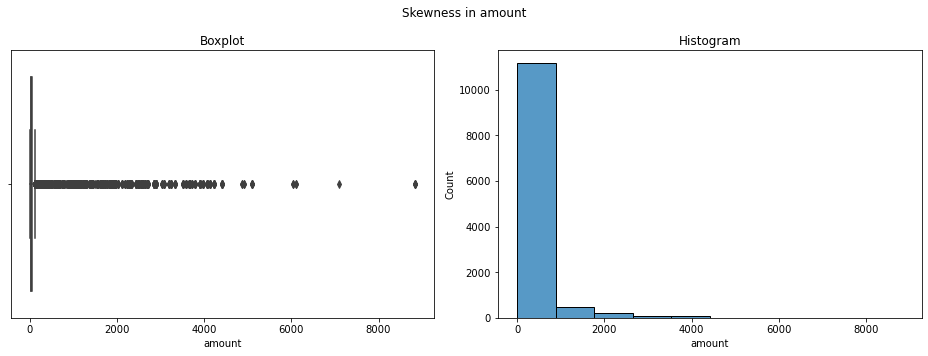

In [24]:
fig, axes = plt.subplots(1, 2, figsize = (13, 5))
fig.suptitle('Skewness in amount')

sns.boxplot(ax = axes[0], x=df['amount'])
axes[0].set_title('Boxplot')

# sns.kdeplot(ax = axes[1], x = 'amount',  cut=0 , data = df)
sns.histplot(ax = axes[1], x = 'amount', bins = 10, data = df)
axes[1].set_title('Histogram')

plt.tight_layout()
plt.show()

In [25]:
# Transaction volume
df['transaction_date'] = pd.to_datetime(df['transaction_date'])
weekly_trans_volume = df.groupby([pd.Grouper(key='transaction_date', freq='W-MON')])['amount'].count().reset_index().sort_values('transaction_date')

In [26]:
weekly_trans_volume

,transaction_date,amount
0,2018-08-06,763
1,2018-08-13,899
2,2018-08-20,784
3,2018-08-27,934
4,2018-09-03,938
5,2018-09-10,930
6,2018-09-17,939
7,2018-09-24,932
8,2018-10-01,940
9,2018-10-08,941


<function matplotlib.pyplot.show(close=None, block=None)>

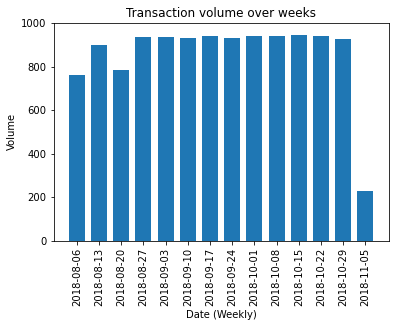

In [27]:
# Transaction volume
plt.bar(weekly_trans_volume['transaction_date'], weekly_trans_volume['amount'], width = 5)
plt.xlabel('Date (Weekly)')
x_tics = weekly_trans_volume['transaction_date']
plt.xticks(x_tics, weekly_trans_volume['transaction_date'].astype(str), rotation = 'vertical')
plt.ylabel('Volume')
plt.ylim(0, 1000)
plt.title('Transaction volume over weeks')
plt.show

In [28]:
# Transaction amount
weekly_trans_amount = df.groupby([pd.Grouper(key='transaction_date', freq='W-MON')])['amount'].sum().reset_index().sort_values('transaction_date')

In [29]:
weekly_trans_amount

,transaction_date,amount
0,2018-08-06,142761.62
1,2018-08-13,160555.43
2,2018-08-20,159361.42
3,2018-08-27,158531.13
4,2018-09-03,161532.78
5,2018-09-10,174702.96
6,2018-09-17,182506.22
7,2018-09-24,180968.98
8,2018-10-01,180388.22
9,2018-10-08,161923.42


<function matplotlib.pyplot.show(close=None, block=None)>

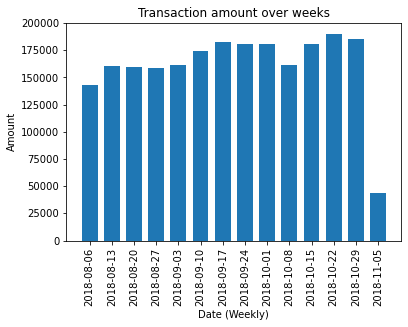

In [30]:
plt.bar(weekly_trans_amount['transaction_date'], weekly_trans_amount['amount'], width = 5)
plt.xlabel('Date (Weekly)')
x_tics = weekly_trans_amount['transaction_date']
plt.xticks(x_tics, weekly_trans_amount['transaction_date'].astype(str), rotation = 'vertical')
plt.ylabel('Amount')
plt.ylim(0, 200000)
plt.title('Transaction amount over weeks')
plt.show

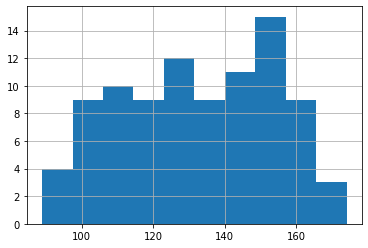

In [31]:
# Transaction volumn
df.groupby('date')['transaction_id'].count().hist()
plt.show()

In [ ]:
months = ['10', '11', '12', '1', '2', '12', '3', '5']

In [ ]:
for y in range(len(years)):
    print('Year \t Month \t Amount \t Average')
    for m in range(len(months)):
        test = int(months[m])
        if test+1 == 13:
            months[m] = '1'
        else: 
            test += 1
#         print(months[m], test)
        start_date = years[y] + '-' + months[m] + '-01'
        end_date = years[y] + '-' + str(test) + '-01'
#         print(years[y] + '-' + test + '-01')
#         print(start_date + ' ' + end_date)
#         print(df['amount'].loc[(df['date'] > start_date) & (df['date'] < end_date)].sum())
        month_sum = round(df['amount'].loc[(df['date'] > start_date) & (df['date'] < end_date)].sum(), 2)
        month_avg = round(df['amount'].loc[(df['date'] > start_date) & (df['date'] < end_date)].mean(), 2)
#         month_sum = round(df['amount'].loc[df['date'] <= years[y] + '-' + months[m] + '-01' ].to_numpy().sum(), 2)
#         month_avg = round(df['amount'].loc[df['date'] <= years[y] + '-' + months[m] + '-01' ].to_numpy().mean(), 2)
        print(f'{years[y]} \t {months[m]} \t {month_sum} \t {month_avg}')

In [ ]:
df['amount'].mean()

In [ ]:
# df['date'].loc[df['date'] == '2018-09']
# df.groupby('date')['amount'].sum() 
for y in range(len(years)):
    print('Year \t Month \t Total_transactions \t Avg_transactions')
    for m in range(len(months)):
        end_month = int(months[m])
        if end_month+1 == 13:
            months[m] = '1'
        else: 
            end_month += 1
            
        start_date = years[y] + '-' + months[m] + '-01'
        end_date = years[y] + '-' + str(end_month) + '-01'
        
        # dtype = np.int32
        month_total_trans = df['transaction_id'].loc[(df['date'] >= start_date) & (df['date'] < end_date)].count()
        month_unique_cust = df['customer_id'].loc[(df['date'] >= start_date) & (df['date'] < end_date)].nunique()
#         print(month_total_trans/month_unique_cust)
#         print(month_unique_cust/month_total_trans)
#         print(type(month_total_trans))
#         print(type(int(month_total_trans)))
        month_avg_trans = month_total_trans/month_unique_cust
        print(f'{years[y]} \t {months[m]} \t {month_total_trans} \t\t\t {month_avg_trans}')

In [ ]:
# len(df['transaction_id'].loc[(df['date'] >= start_date) & (df['date'] < end_date)])
df['customer_id'].loc[(df['date'] >= start_date) & (df['date'] < end_date)].nunique()

In [ ]:
pd.date_range(start = '2018-03-01', end = '2018-04-01', closed = 'left')

#a in df['date'].astype('str')